***Pipeline Preperation and Running***


***Import Necessary Libraries***

In [92]:
# Import libraries for data loading and viusalization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# performance metrics libraries
import sklearn.metrics as metrics

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    ConfusionMatrixDisplay 
)

# for building Decision tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#  for the logistic regression model
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# ML models
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier
)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# to create pipeline and make_pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# to use standard scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

***Load the data***


In [93]:
# Load the data file "BankChurners.csv" and read it as a dataframe
df = pd.read_csv("BankChurners.csv")

***Drop Prior Classificaiton Columns***


In [94]:
df.drop([df.columns[21],df.columns[22]],axis=1,inplace=True)
df.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


***Split the dataset into train and test***

In [95]:

#separate the Target
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

In [96]:
 #Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 20) (2026, 20) (2026, 20)


***Commented OUT***
***Imput missing values*** 
***Cols with missing values Education_Level, Marital_Status & Income_Category***

In [97]:
# imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
# cols_to_impute = ["Education_Level", "Marital_Status", "Income_Category"]

# Impute missing values on the training data
# X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Impute missing values on the validation and test data
# X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])
# X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

***Creating dummy variables for categorical variables & the target***

In [98]:
# dummy for categories 
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

# dummy for the target
y_train = pd.get_dummies(data=y_train, drop_first=True)
y_val = pd.get_dummies(data=y_val, drop_first=True)
y_test = pd.get_dummies(data=y_test, drop_first=True)

***Check class balance in dataset***

In [99]:
print("Target value ratio in y")
print(y.value_counts())
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts())
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts())
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts())
print("*" * 80)

Target value ratio in y
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
********************************************************************************
Target value ratio in y_train
Existing Customer
True                 5099
False                 976
Name: count, dtype: int64
********************************************************************************
Target value ratio in y_val
Existing Customer
True                 1700
False                 326
Name: count, dtype: int64
********************************************************************************
Target value ratio in y_test
Existing Customer
True                 1701
False                 325
Name: count, dtype: int64
********************************************************************************


***Handling class imbalance by oversampling***

In [100]:

# Print class distribution before oversampling
print("Class Distribution before SMOTE (Original):")
print(y_train.value_counts())

# Apply SMOTE only to the training data
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution after oversampling
print("\nClass Distribution after SMOTE (Oversampled):")
print(y_train_resampled.value_counts())

# Note: Do not apply SMOTE to the validation data

Class Distribution before SMOTE (Original):
Existing Customer
True                 5099
False                 976
Name: count, dtype: int64

Class Distribution after SMOTE (Oversampled):
Existing Customer
False                5099
True                 5099
Name: count, dtype: int64


***Classification Model***

In [101]:
models = []  
models.append(("Logistic Regression", LogisticRegression(random_state=1, max_iter=1000)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1, algorithm='SAMME')))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  
names = []  
score = []

print("\nCross-Validation Performance:\n")
for name, model in models:
    scoring = "precision"
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train.values.ravel(), scoring=scoring, cv=kfold)
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\nValidation Performance:\n")

for name, model in models:
    model.fit(X_train, y_train.values.ravel())
    scores = precision_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic Regression: 86.32051232923095
dtree: 95.82250792202535
Random forest: 95.67274774590763
GBM: 96.92782780284365
Adaboost: 94.93853738882785
Xgboost: 97.63265695940122

Validation Performance:

Logistic Regression: 0.8854673149648838
dtree: 0.9546775130737943
Random forest: 0.9501980758347481
GBM: 0.9660529344073648
Adaboost: 0.9394279304542905
Xgboost: 0.9733333333333334


***plotting boxplots of validation scores***

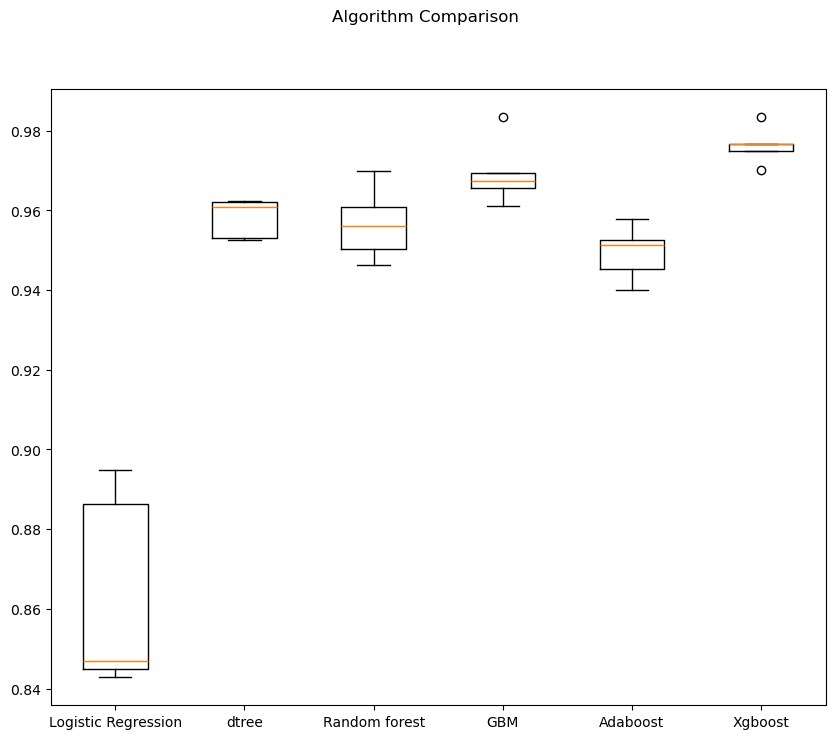

In [102]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10,8))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

***Classifiers Results***

***(1)Ramdom Forest Classifier***

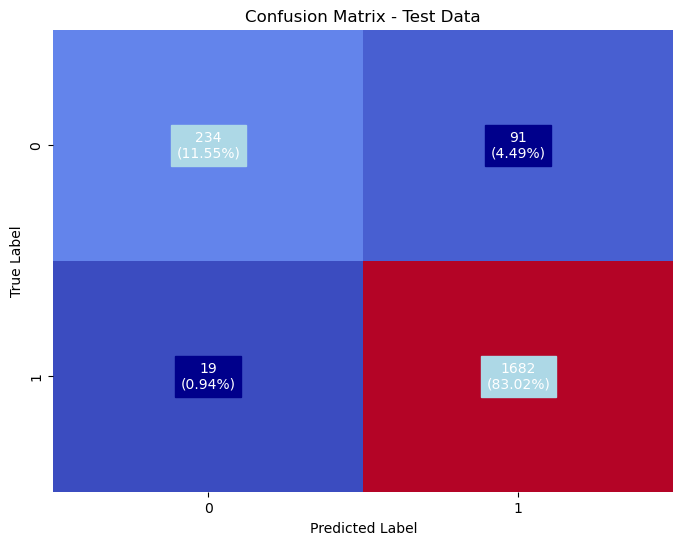

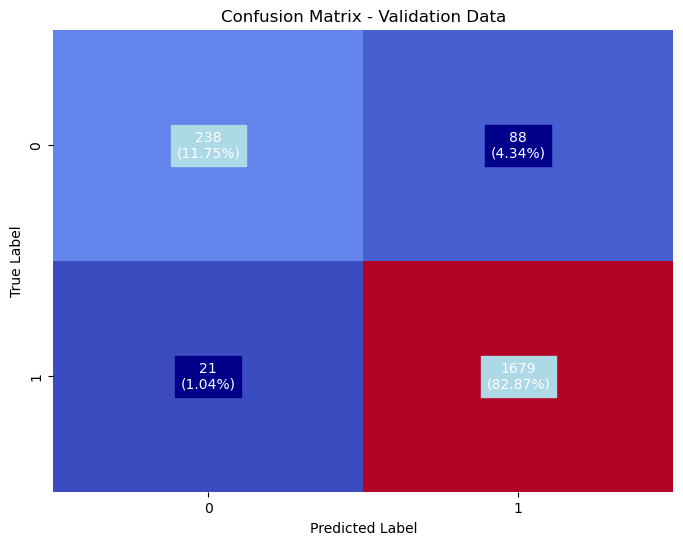

Test Accuracy: 0.945705824284304
Validation Accuracy: 0.9461994076999013
Test Precision: 0.94486096586751
Test Recall: 0.945705824284304
Test F1 Score: 0.942886814067321


In [117]:

def annotate_cm(ax, cm):
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            color = 'lightblue' if i == j else 'darkblue'  # Color based on correctness
            ax.text(j + 0.5, i + 0.5, f"{cm[i, j]}\n({cm[i, j] / cm.sum() * 100:.2f}%)",
                    ha='center', va='center', color='white', backgroundcolor=color)

def random_forest_classifier (X_train, y_train, X_test, y_test, X_val, y_val):
    # Convert target variables to 1D arrays
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    y_val = y_val.values.ravel()
    
    # Train a Random Forest classifier
    rf = RandomForestClassifier(random_state=1)
    rf.fit(X_train, y_train)
    
    # Make predictions on test and validation data
    y_test_pred = rf.predict(X_test)
    y_val_pred = rf.predict(X_val)
    
    # Calculate performance metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Generate confusion matrices for test and validation data
    cm_test = confusion_matrix(y_test, y_test_pred)
    cm_val = confusion_matrix(y_val, y_val_pred)
    
    # Plot confusion matrix for test data with percentage annotation
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_test, annot=False, fmt='', cmap='coolwarm', cbar=False)
    annotate_cm(plt.gca(), cm_test)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label') 
    plt.title('Confusion Matrix - Test Data')
    plt.show()
    
    # Plot confusion matrix for validation data with percentage annotation
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_val, annot=False, fmt='', cmap='coolwarm', cbar=False)
    annotate_cm(plt.gca(), cm_val)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Validation Data')
    plt.show()
    
    return {
        'Test Accuracy': test_accuracy,
        'Validation Accuracy': val_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1 Score': test_f1
    }

# Example usage:
evaluation_results = random_forest_classifier(X_train, y_train, X_test, y_test, X_val, y_val)

# Print the evaluation results
for metric, value in evaluation_results.items():
    print(f'{metric}: {value}')

***(2)Logistic Regression Classifier***

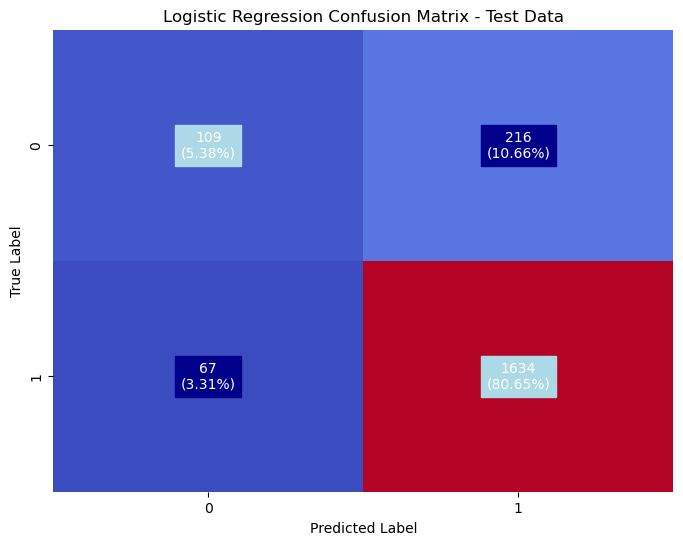

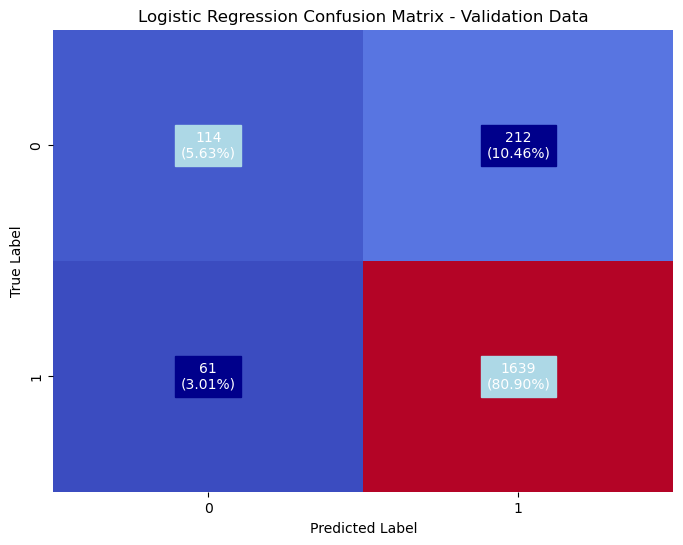


Evaluation Results for Logistic Regression Classifier:
Test Accuracy: 0.8603158933859822
Validation Accuracy: 0.8652517275419546
Test Precision: 0.8409058074272783
Test Recall: 0.8603158933859822
 Test F1 Score: 0.8424750776222013


In [120]:
from sklearn.linear_model import LogisticRegression

def logistic_regression_classifier (X_train, y_train, X_test, y_test, X_val, y_val):
    # Convert target variables to 1D arrays
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    y_val = y_val.values.ravel()
    
    # Train a Logistic Regression classifier
    lr = LogisticRegression(random_state=1, max_iter=1000)  # Increase max_iter to 1000 (or a higher value)
    lr.fit(X_train, y_train)
    
    # Make predictions on test and validation data
    y_test_pred = lr.predict(X_test)
    y_val_pred = lr.predict(X_val)
    
    # Calculate performance metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Generate confusion matrices for test and validation data
    cm_test = confusion_matrix(y_test, y_test_pred)
    cm_val = confusion_matrix(y_val, y_val_pred)
    
    # Plot confusion matrix for test data with percentage annotation
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_test, annot=False, fmt='', cmap='coolwarm', cbar=False)
    annotate_cm(plt.gca(), cm_test)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label') 
    plt.title('Logistic Regression Confusion Matrix - Test Data')
    plt.show()
    
    # Plot confusion matrix for validation data with percentage annotation
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_val, annot=False, fmt='', cmap='coolwarm', cbar=False)
    annotate_cm(plt.gca(), cm_val)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Logistic Regression Confusion Matrix - Validation Data')
    plt.show()
    
    return {
        'Test Accuracy': test_accuracy,
        'Validation Accuracy': val_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        ' Test F1 Score': test_f1
    }

# Example usage for Logistic Regression Classifier:
evaluation_results_lr = logistic_regression_classifier(X_train, y_train, X_test, y_test, X_val, y_val)

# Print the evaluation results for Logistic Regression Classifier
print("\nEvaluation Results for Logistic Regression Classifier:")
for metric, value in evaluation_results_lr.items():
    print(f'{metric}: {value}')

***(3)Gradient Boosting Classifier***

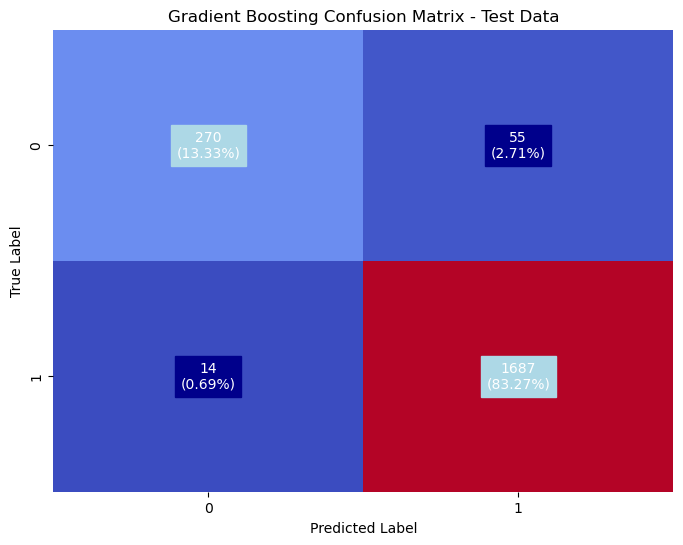

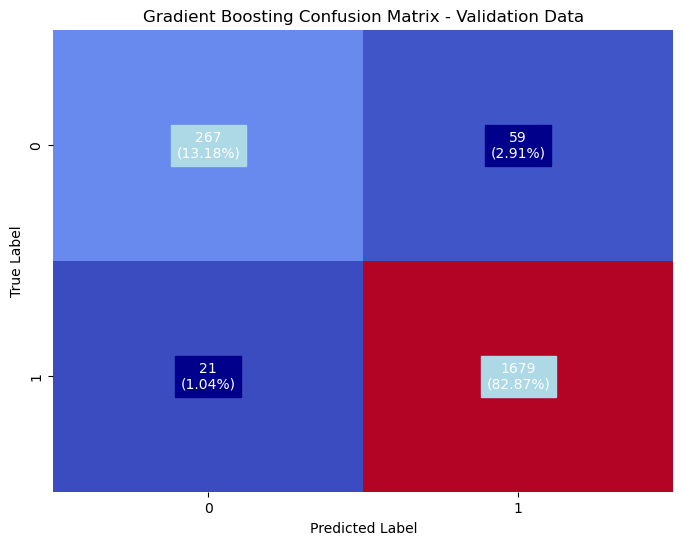


Evaluation Results for Gradient Boosting Classifier:
Test Accuracy: 0.9659427443237907
Validation Accuracy: 0.9605133267522211
Test Precision: 0.9655840880219315
Test Recall: 0.9659427443237907
 Test F1 Score: 0.9649990984584641


In [121]:

def gradient_boosting_classifier(X_train, y_train, X_test, y_test, X_val, y_val):
    # Convert target variables to 1D arrays
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    y_val = y_val.values.ravel()
    
    # Train a Gradient Boosting classifier
    gbc = GradientBoostingClassifier(random_state=1)  
    gbc.fit(X_train, y_train)
    
    # Make predictions on test and validation data
    y_test_pred = gbc.predict(X_test)
    y_val_pred = gbc.predict(X_val)
    
    # Calculate performance metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Generate confusion matrices for test and validation data
    cm_test = confusion_matrix(y_test, y_test_pred)
    cm_val = confusion_matrix(y_val, y_val_pred)
    
    # Plot confusion matrix for test data with percentage annotation
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_test, annot=False, fmt='', cmap='coolwarm', cbar=False)
    annotate_cm(plt.gca(), cm_test)  # Assuming you have a function for annotating confusion matrix
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label') 
    plt.title('Gradient Boosting Confusion Matrix - Test Data')
    plt.show()
    
    # Plot confusion matrix for validation data with percentage annotation
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_val, annot=False, fmt='', cmap='coolwarm', cbar=False)
    annotate_cm(plt.gca(), cm_val)  # Assuming you have a function for annotating confusion matrix
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Gradient Boosting Confusion Matrix - Validation Data')
    plt.show()
    
    return {
        'Test Accuracy': test_accuracy,
        'Validation Accuracy': val_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        ' Test F1 Score': test_f1
    }

# Example usage for Gradient Boosting Classifier:
evaluation_results_gbc = gradient_boosting_classifier(X_train, y_train, X_test, y_test, X_val, y_val)

# Print the evaluation results for Gradient Boosting Classifier
print("\nEvaluation Results for Gradient Boosting Classifier:")
for metric, value in evaluation_results_gbc.items():
    print(f'{metric}: {value}')


***(4) XGBoost Classifier***

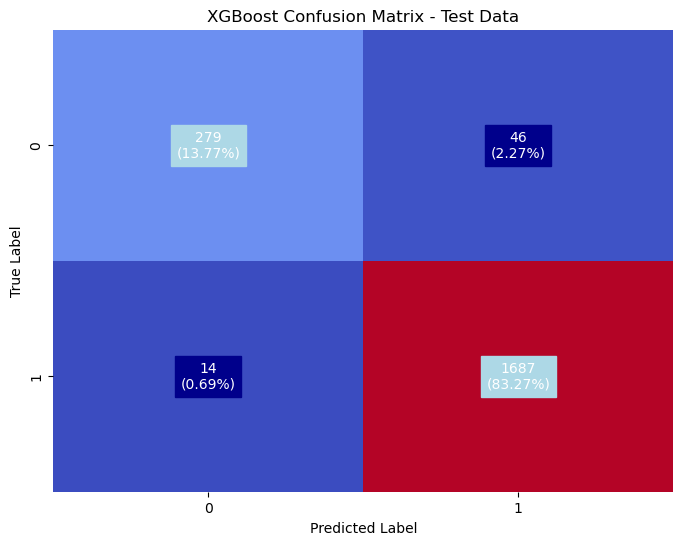

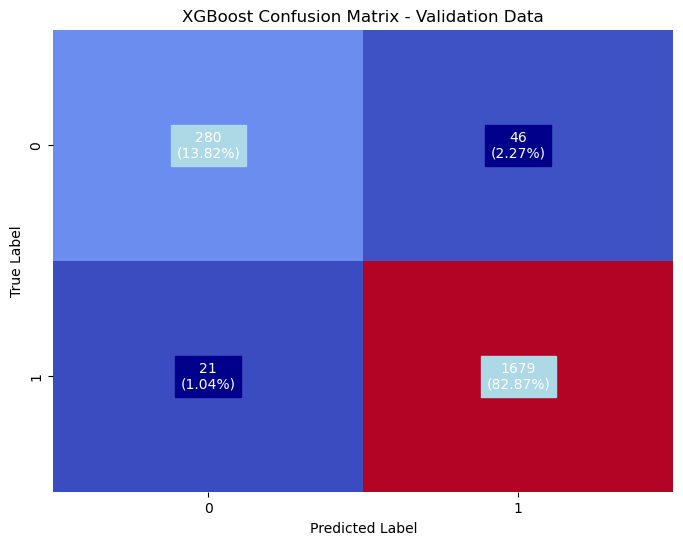


Evaluation Results for XGBoost Classifier:
Test Accuracy: 0.9703849950641659
Validation Accuracy: 0.9669299111549852
Test Precision: 0.9700495478160636
Test Recall: 0.9703849950641659
Test F1 Score: 0.9697562484250982


In [124]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def xgboost_classifier(X_train, y_train, X_test, y_test, X_val, y_val):
    # Convert target variables to 1D arrays
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    y_val = y_val.values.ravel()
    
    # Train an XGBoost classifier
    xgb = XGBClassifier(random_state=1)
    xgb.fit(X_train, y_train)
    
    # Make predictions on test and validation data
    y_test_pred = xgb.predict(X_test)
    y_val_pred = xgb.predict(X_val)
    
    # Calculate performance metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Generate confusion matrices for test and validation data
    cm_test = confusion_matrix(y_test, y_test_pred)
    cm_val = confusion_matrix(y_val, y_val_pred)
    
    # Plot confusion matrix for test data with percentage annotation
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_test, annot=False, fmt='', cmap='coolwarm', cbar=False)
    annotate_cm(plt.gca(), cm_test)  # Assuming you have a function for annotating confusion matrix
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label') 
    plt.title('XGBoost Confusion Matrix - Test Data')
    plt.show()
    
    # Plot confusion matrix for validation data with percentage annotation
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_val, annot=False, fmt='', cmap='coolwarm', cbar=False)
    annotate_cm(plt.gca(), cm_val)  # Assuming you have a function for annotating confusion matrix
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('XGBoost Confusion Matrix - Validation Data')
    plt.show()
    
    return {
        'Test Accuracy': test_accuracy,
        'Validation Accuracy': val_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1 Score': test_f1
    }

# Example usage for XGBoost Classifier:
evaluation_results_xgb = xgboost_classifier(X_train, y_train, X_test, y_test, X_val, y_val)

# Print the evaluation results for XGBoost Classifier
print("\nEvaluation Results for XGBoost Classifier:")
for metric, value in evaluation_results_xgb.items():
    print(f'{metric}: {value}')


***Feaures Importance***

/Users/ARahim/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


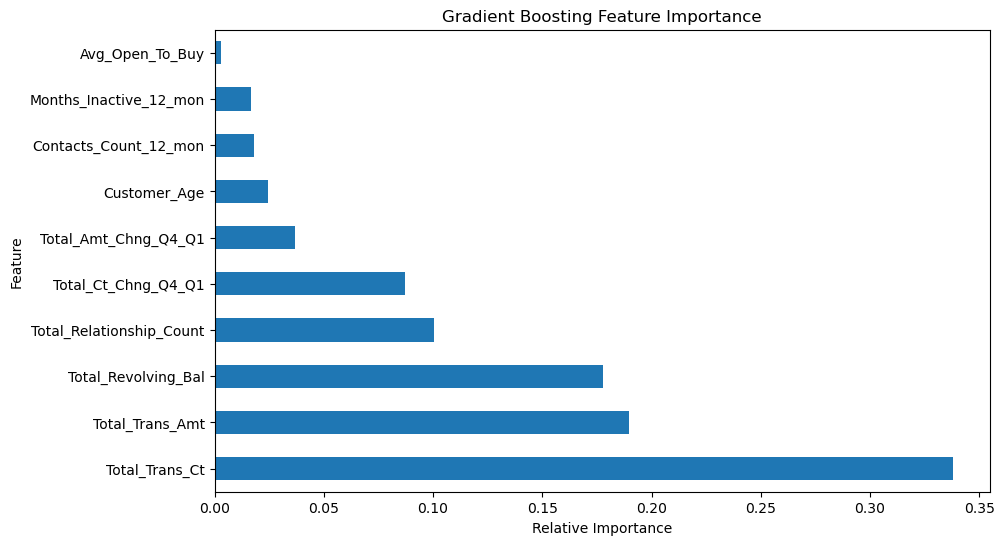

In [127]:
# Assuming you already have trained the model gbc
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

# Plot feature importance
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(gbc.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()


***import imbalanced library to handle imbalanced data***
***!pip install -U imbalanced-learn***
***!pip install --upgrade scikit-learn***